# E-commerse sales data analysis

In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime
    import re
    from scipy.stats import shapiro
    from scipy.stats import normaltest
except Exception as E:
    print(E)

In [68]:
data = pd.read_csv("C:/Users/User/Desktop/E-commerce Sales data.csv", encoding = 'latin1')


In [69]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


#### Columns definition:-
1. Row ID: A unique identifier for each row.
2. Order ID: A unique identifier for each order.
3. Order Date: Date when the order was placed.
4. Ship Date: Date when the order was shipped.
5. Ship Mode: Method of shipment (e.g., standard, express).
6. Customer ID: Unique identifier for each customer.
7. Customer Name: Name of the customer.
8. Segment: Segment to which the customer belongs (e.g., corporate, consumer).
9. City: City where the customer is located.
10. State: State where the customer is located.
11. Country: Country where the customer is located.
12. Postal Code: Postal code of the customer's location.
13. Market: Market where the order was placed.
14. Region: Region where the order was placed.
15. Product ID: Unique identifier for each product.
16. Category: Category of the product (e.g., office supplies, technology).
17. Sub-Category: Sub-category of the product (e.g., paper, chairs).
18. Product Name: Name of the product.
19. Sales: Sales amount for the product.
20. Quantity: Quantity of the product ordered.
21. Discount: Discount applied to the product.
22. Profit: Profit generated from the product.
23. Shipping Cost: Cost of shipping for the product.
24. Order Priority: Priority level of the order.

In [4]:
# Identify the foreign names in customer name column
ForeignName =  [i for i in data['Customer Name'].tolist() if(re.search(r'[^a-zA-Z]',i.replace(' ','')))]

In [5]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [6]:
data.ndim

2

In [7]:
data.shape

(51290, 24)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [9]:
data.describe(include=object)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [10]:
null = data.isnull().sum().sort_values(ascending=False)
null

Postal Code       41296
Row ID                0
Region                0
Shipping Cost         0
Profit                0
Discount              0
Quantity              0
Sales                 0
Product Name          0
Sub-Category          0
Category              0
Product ID            0
Market                0
Order ID              0
Country               0
State                 0
City                  0
Segment               0
Customer Name         0
Customer ID           0
Ship Mode             0
Ship Date             0
Order Date            0
Order Priority        0
dtype: int64

### Handling Null values in our dataset

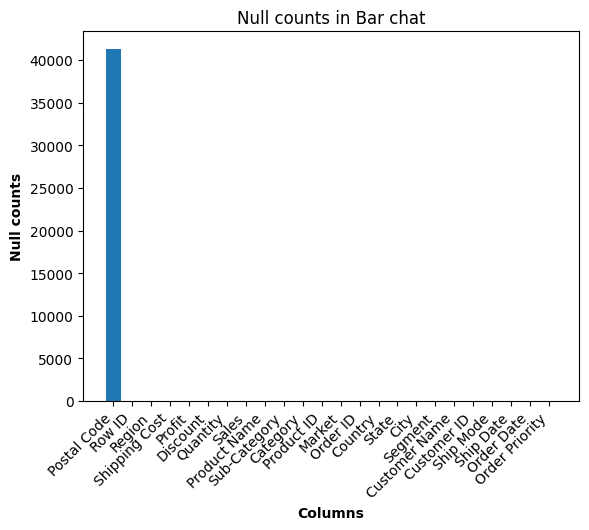

In [11]:
plt.bar(null.index,null.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns',fontweight='bold')
plt.ylabel('Null counts',fontweight='bold')
plt.title('Null counts in Bar chat', fontsize='12' )
plt.show()

In [12]:
data[data['Postal Code'].notnull()]['Postal Code'].count()

9994

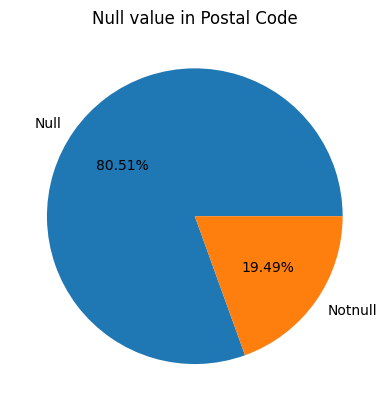

In [13]:
null = data['Postal Code'].isnull().sum()
notnull = len(data)-null
pd.Series([null,notnull],index=['Null','Notnull']).plot.pie(autopct='%1.2f%%')
plt.title('Null value in Postal Code')
plt.show()

#### Null Values in the 'Postal Code' 
It seems like a significant portion of the "Postal Code" column contains Null values. Depending on the importance of this information for our analysis, we have a few options for handling these Null values:

Imputation: We can fill in missing postal codes using various imputation methods such as replacing them with the mode (most common value), mean, or median of the column. However, this approach has imputed values which may introduce bias into our analysis.

Deletion: If the missing values in the "Postal Code" column are not crucial for our analysis, we might choose to delete the column entirely or drop rows with missing postal codes.

Manual Completion: Depending on the context of your dataset, you may have access to additional information that could help fill in the missing postal codes manually.

It's essential to consider the impact of missing postal codes on our analysis and the potential consequences of each handling method.
#### Additionally, in future we may want to investigate why these values are missing in the first place to prevent similar issues.

#### I  decide to replace missing postal code values with "NA" is based on several consideration. 
Postal codes are specific to geographical areas and can vary widely so we cant use mean, median or mode to fill. Deleting the column or rows with missing postal codes would potentially impacting the integrity and comprehensiveness of our dataset. Given the large number of missing values in the postal code column, manual completion would be impractical and time-consuming. By clearly labeling missing values as "NA," we can maintain transparency in our analysis.

In [14]:
data['Postal Code'].fillna('NA', inplace=True)       #Replace null values with NA

In [15]:
data[data['Postal Code'].isnull()]['Postal Code'].count()     # Count of null value after replacing

0

### Check sales value

In [16]:
data[data['Sales']==0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


#### It's essential to confirm that there are no zero values in the "Sales" column, from above outcome it ensures the integrity and reliability of your sales data. With this confirmation, we can proceed with confidence in our analysis knowing that the sales values are valid and representative of actual transactions

### Outlier handling

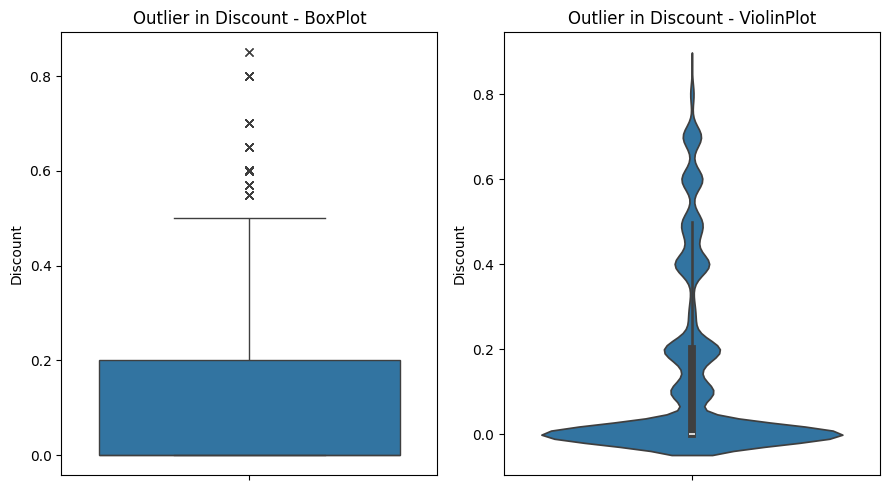

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))
sns.boxplot(data.Discount,ax=axes[0],flierprops={"marker": "x"})
axes[0].set_title("Outlier in Discount - BoxPlot")

sns.violinplot(data.Discount,ax=axes[1])
axes[1].set_title("Outlier in Discount - ViolinPlot")

plt.tight_layout()
plt.show()

##### From above two left plot (Box plot) we can see the outliers are from .6 to .8 in discount and from right side (violin plot) we can see thick bandwidth which implies .0 - .05 range is the most provided discount

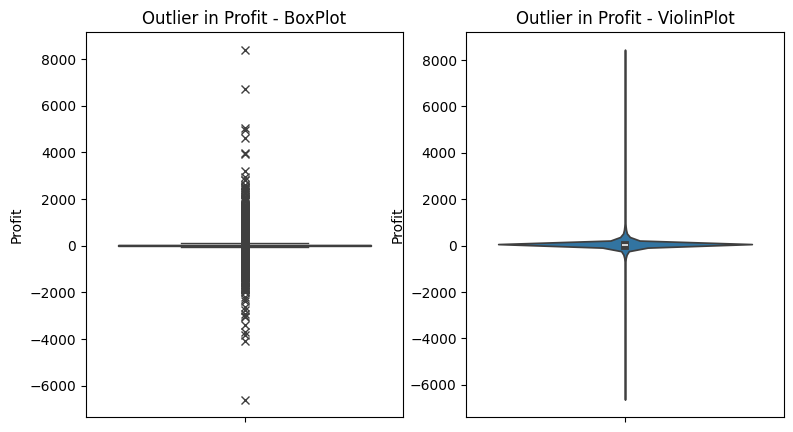

In [18]:
fig1, axes = plt.subplots(1,2,figsize=(9,5))
sns.boxplot(data.Profit,ax=axes[0],flierprops={"marker": "x"})
axes[0].set_title("Outlier in Profit - BoxPlot")
sns.violinplot(data.Profit,ax=axes[1])
axes[1].set_title("Outlier in Profit - ViolinPlot")
plt.show()

#### From the above box plot indicates a wide range of profit values from negative to extreme positive, with a significant concentration around zero and some extreme outliers.

In [19]:
print(data['Profit'].describe())

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64


In [20]:
q1 = data['Profit'].quantile(0.25)
q3 = data['Profit'].quantile(0.75)
IQR = q3-q1
c = 3                                            # c is a constant value to adjust the upper and lower outlier band
lower = q1 - c*IQR
upper = q3 + 10*IQR
print("Outlier upper and lower band: {} & {}".format(upper,lower))
outlier = data[(data['Profit']<lower) | (data['Profit']>upper)]
print("Outlier count:",len(outlier))

Outlier upper and lower band: 404.91 & -110.43
Outlier count: 2984


#### With the outlier range of -110 to 404 there are extreme count of outlier in profit in our sales data set.

In [21]:
# Identify extreme positive outliers
extreme_positive_outliers = data[data['Profit'] > c * IQR + q3]
print("Extreme positive outliers:")
extreme_positive_outliers

Extreme positive outliers:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
12,41445,IR-2011-6550,1/2/2011,6/2/2011,Standard Class,PO-8850,Patrick O'Brill,Consumer,Mashhad,Razavi Khorasan,...,FUR-ADV-10002601,Furniture,Furnishings,"Advantus Photo Frame, Erganomic",309.60,6,0.0,148.50,19.65,High
24,13130,ES-2011-1705541,1/3/2011,6/3/2011,Standard Class,TS-21370,Todd Sumrall,Corporate,Farnborough,England,...,FUR-BO-10000259,Furniture,Bookcases,"Safco Classic Bookcase, Traditional",1314.45,3,0.0,341.73,150.40,High
25,48599,UP-2011-3730,1/3/2011,5/3/2011,Standard Class,RD-9900,Ruben Dartt,Consumer,Vinnytsya,Vinnytsya,...,TEC-LOG-10003896,Technology,Accessories,"Logitech Router, Erganomic",1470.78,6,0.0,264.60,146.55,Medium
29,13131,ES-2011-1705541,1/3/2011,6/3/2011,Standard Class,TS-21370,Todd Sumrall,Corporate,Farnborough,England,...,FUR-CH-10002830,Furniture,Chairs,"Office Star Rocking Chair, Red",704.55,5,0.0,288.75,64.40,High
30,48593,UP-2011-3730,1/3/2011,5/3/2011,Standard Class,RD-9900,Ruben Dartt,Consumer,Vinnytsya,Vinnytsya,...,OFF-FEL-10002867,Office Supplies,Storage,"Fellowes Lockers, Single Width",1244.16,6,0.0,211.50,60.78,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51232,12929,ES-2014-3458802,31-12-2014,5/1/2015,Standard Class,JG-15805,John Grady,Corporate,Maidenhead,England,...,TEC-PH-10003683,Technology,Phones,"Motorola Audio Dock, VoIP",867.30,5,0.0,251.40,53.16,Medium
51234,15693,ES-2014-1695428,31-12-2014,2/1/2015,Second Class,RD-19480,Rick Duston,Consumer,Caen,Lower Normandy,...,OFF-ST-10002159,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",557.28,3,0.1,216.72,51.79,Medium
51236,15297,ES-2014-5281275,31-12-2014,4/1/2015,Second Class,SS-20515,Shirley Schmidt,Home Office,Madrid,Madrid,...,TEC-CO-10002284,Technology,Copiers,"Hewlett Copy Machine, Color",530.22,2,0.0,180.24,48.00,Medium
51252,42474,OD-2014-9490,31-12-2014,5/1/2015,Standard Class,MW-8235,Mitch Willingham,Corporate,Juba,Central Equatoria,...,TEC-CAN-10004291,Technology,Copiers,"Canon Wireless Fax, Digital",378.30,1,0.0,166.44,11.71,Medium


In [22]:
# Identify extreme negative outliers
extreme_negative_outliers = data[data['Profit'] < q1 - 1.5 * IQR]
print("Extreme negative outliers:")
extreme_negative_outliers

Extreme negative outliers:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
27,37844,CA-2011-113880,1/3/2011,5/3/2011,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,Illinois,...,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.1160,6,0.30,-172.1172,70.05,High
44,26926,IN-2011-26946,1/3/2011,6/3/2011,Standard Class,LH-17155,Logan Haushalter,Consumer,Palembang,Sumatera Selatan,...,OFF-EN-10004495,Office Supplies,Envelopes,"Kraft Peel and Seal, Security-Tint",109.1853,9,0.47,-74.4147,14.58,Medium
76,15978,IT-2011-3468929,1/4/2011,4/4/2011,First Class,AS-10045,Aaron Smayling,Corporate,Rome,Lazio,...,TEC-PH-10003963,Technology,Phones,"Apple Signal Booster, Full Size",496.5840,6,0.40,-289.8360,122.65,High
102,15780,ES-2011-3108517,1/6/2011,6/6/2011,Standard Class,MH-17620,Matt Hagelstein,Corporate,Cork,Cork,...,FUR-BO-10004254,Furniture,Bookcases,"Ikea Classic Bookcase, Traditional",1029.3750,5,0.50,-247.1250,141.50,High
114,47598,TU-2011-7020,1/6/2011,1/6/2011,Same Day,WB-11850,William Brown,Consumer,Istanbul,Istanbul,...,OFF-FEL-10001865,Office Supplies,Storage,"Fellowes File Cart, Wire Frame",109.1040,2,0.60,-106.4160,17.97,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51198,42650,TU-2013-9400,31-12-2013,4/1/2014,Standard Class,TM-11490,Tony Molinari,Consumer,Gaziantep,Gaziantep,...,TEC-SAM-10001017,Technology,Phones,"Samsung Speaker Phone, Cordless",100.8720,2,0.60,-108.4680,7.28,Medium
51211,42652,TU-2013-9400,31-12-2013,4/1/2014,Standard Class,TM-11490,Tony Molinari,Consumer,Gaziantep,Gaziantep,...,OFF-ELD-10000151,Office Supplies,Storage,"Eldon File Cart, Industrial",51.1560,1,0.60,-61.4040,2.72,Medium
51231,26333,IN-2014-30390,31-12-2014,3/1/2015,First Class,JD-16150,Justin Deggeller,Corporate,Bangkok,Bangkok,...,FUR-TA-10001531,Furniture,Tables,"Lesro Training Table, Adjustable Height",1048.7313,9,0.57,-1195.2387,86.86,High
51239,28570,ID-2014-54442,31-12-2014,4/1/2015,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Manila,National Capital,...,TEC-CO-10000666,Technology,Copiers,"Hewlett Copy Machine, Laser",684.6060,4,0.35,-63.2340,42.92,Medium


#### Identifing the the above outliers will help us to give more importance on analysing the reason for such extreme loses and improve the sales

### Outliers in sales

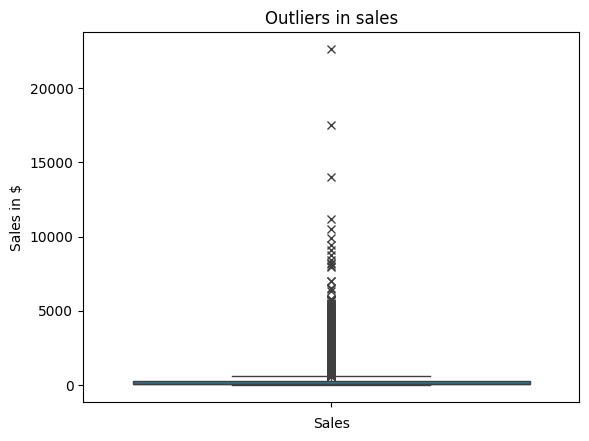

In [23]:
sns.boxplot(data['Sales'],flierprops={"marker": "x"})
plt.title("Outliers in sales")
plt.ylabel("Sales in $")
plt.xlabel("Sales")
plt.show()

In [24]:
data[data['Order ID']==data['Order ID'].value_counts().index[0]]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
34869,37396,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Sta...,2888.127,11,0.1,609.7157,177.06,Medium
34870,37398,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,FUR-CH-10001215,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,2254.410,5,0.1,375.7350,175.20,Medium
34871,37397,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,TEC-PH-10002885,Technology,Phones,Apple iPhone 5,1299.660,2,0.0,350.9082,53.23,Medium
34873,37387,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.646,3,0.1,18.1764,29.25,Medium
34874,37388,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,TEC-AC-10002647,Technology,Accessories,Logitech Wireless Boombox Speaker - portable -...,212.800,2,0.0,95.7600,15.57,Medium
34875,37399,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,TEC-PH-10000215,Technology,Phones,Plantronics Cordless Phone Headset with In-lin...,104.850,3,0.0,28.3095,8.25,Medium
34876,37393,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",80.991,1,0.1,8.0991,7.78,Medium
34878,37400,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,TEC-AC-10001998,Technology,Accessories,Logitech LS21 Speaker System - PC Multimedia -...,59.970,3,0.0,20.3898,3.42,Medium
34879,37390,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,72.640,2,0.0,21.7920,2.48,Medium
34881,37391,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,...,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",45.400,4,0.0,12.7120,1.91,Medium


In [25]:
data["Order ID"].value_counts().head(15)

Order ID
CA-2014-100111     14
NI-2014-8880       13
TO-2014-9950       13
IN-2012-41261      13
IN-2013-42311      13
MX-2014-166541     13
MX-2013-142678     12
CA-2014-157987     12
ES-2012-5776825    12
IN-2014-15263      12
IN-2011-76625      12
MX-2013-127705     12
ES-2013-2700361    11
ES-2014-5605089    11
MX-2013-159100     11
Name: count, dtype: int64

#### From above we can see that some orders have more value count. It's common for an order to contain multiple products, especially in an e-commerce setting where customers often purchase multiple items in a single transaction. The observation that some orders have multiple products associated with the same order ID is expected and indicates that the dataset includes transactions with multiple items

In [26]:
data.groupby("Order ID")["Product ID"].count()

Order ID
AE-2011-9160    2
AE-2013-1130    2
AE-2013-1530    2
AE-2014-2840    1
AE-2014-3830    6
               ..
ZI-2014-7160    3
ZI-2014-7610    2
ZI-2014-9540    1
ZI-2014-9550    2
ZI-2014-9650    1
Name: Product ID, Length: 25035, dtype: int64

## Univariate analysis

In [27]:
data["Customer ID"].nunique()

1590

#### In our data set 1590 customer id's are there

In [28]:
data["Customer Name"].nunique()

795

#### From above we can see that in our data set customers have same name and 795 unique name are there. So it is good to consider Customer ID as key to perform any customer based analysis

# Numerical Analysis in sales

In [29]:
data["Sales"].sum()/len(data)

246.4905812025736

In [30]:
data["Product ID"].nunique()

10292

#### The above out indicates a 10292 variety of products being sold through this e-commerce platform. Having a large number of unique product IDs suggests a diverse product catalog, which can be beneficial for attracting a wide range of customers and meeting diverse consumer needs.

C:\Users\User\AppData\Local\Temp\ipykernel_18596\255801484.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data,  x= 'Category', hue = None, palette = 'nipy_spectral')


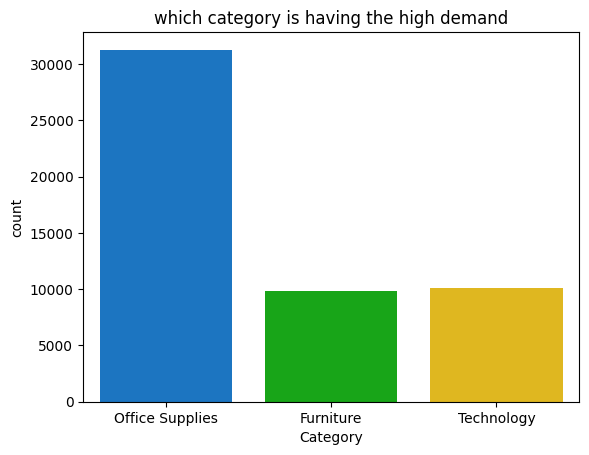

In [31]:
sns.countplot(data = data,  x= 'Category', hue = None, palette = 'nipy_spectral')
plt.title("which category is having the high demand")
plt.show()

In [32]:
print("Unique sub-category:",data["Sub-Category"].nunique())
data["Sub-Category"].value_counts().sort_values(ascending=False)

Unique sub-category: 17


Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_18596\2438632141.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'Sub-Category',palette = 'nipy_spectral')


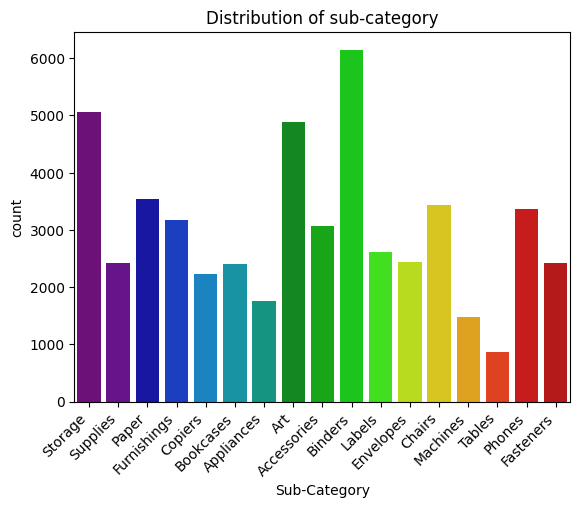

In [33]:
sns.countplot(data = data, x = 'Sub-Category',palette = 'nipy_spectral')
plt.title("Distribution of sub-category")
plt.xticks(rotation=45,ha="right")
plt.show()

#### Here we can see there are 17 sub-categories in this sales data set. Also we can see the 'Binders' sub category is the most sold. This indicates that binders are a popular product category among our customers and could potentially be a significant revenue driver for this e-commerce business.

C:\Users\User\AppData\Local\Temp\ipykernel_18596\2316638463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region.index,y=region.values,palette=["m","k","c","b","y","g"])
C:\Users\User\AppData\Local\Temp\ipykernel_18596\2316638463.py:3: UserWarning: 
The palette list has fewer values (6) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=region.index,y=region.values,palette=["m","k","c","b","y","g"])


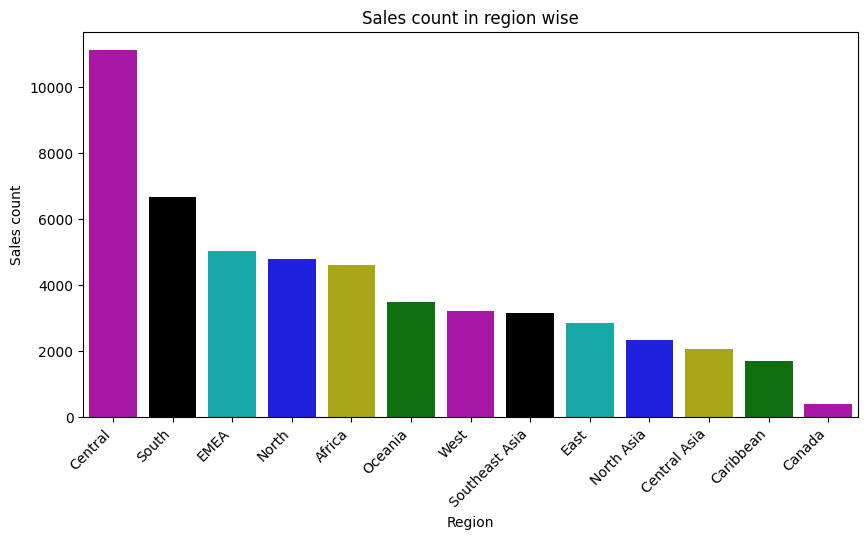

In [34]:
plt.figure(figsize=(10,5))
region = data.Region.value_counts()
sns.barplot(x=region.index,y=region.values,palette=["m","k","c","b","y","g"])
plt.xticks(rotation = 45, ha='right')
plt.ylabel("Sales count")
plt.title("Sales count in region wise")
plt.show()

#### This indicates that the Central region may be a significant market for your e-commerce business, potentially accounting for a large portion of your sales or customer base.

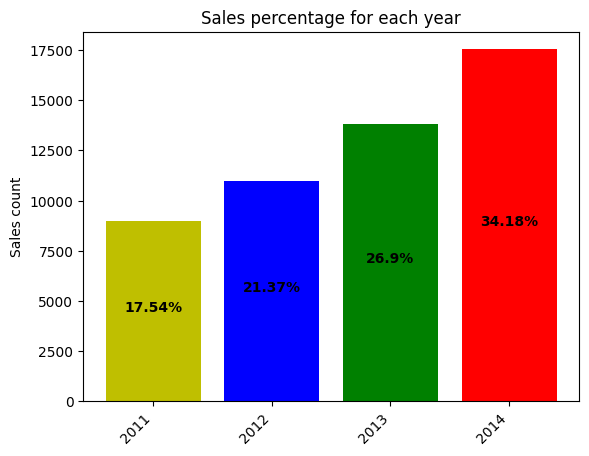

In [35]:
df=data.copy()
df["Order Date"] = data["Order Date"].apply(lambda x : x.replace('/','-').split("-")[2])
orders = df.groupby("Order Date")["Row ID"].count()
pct=round(orders*100/len(df),2)
#print(pct)

#bar = sns.barplot(x=orders.index,y=orders.values,palette=["r","g","b","y"])
bar=plt.bar(orders.keys(),orders.values,color=["y","b","g","r"])
plt.xticks(rotation = 45, ha='right')
plt.ylabel("Sales count")
plt.title("Sales percentage for each year")

i=0
for p in bar:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,y+height*0.5, str(pct[i])+'%', ha='center',weight='bold')
    i=i+1

plt.show()


#### Visualizing the percentage of sales for each year allows for a clear understanding of how sales distribution has evolved over time. Above findings indicate a noticeable increase in sales proportion from 2011 to 2014
1. Yearly Sales Growth: The increase in the percentage of sales from 2011 to 2014 suggests a positive trend in your e-commerce business's performance over the years. This growth may be attributed to various factors such as expanding customer base, product offerings, or improved marketing strategies.
2. Acceleration of Growth: The acceleration in sales growth between 2013 and 2014, with a substantial jump from 26.9% to 34.18%, indicates a period of rapid expansion or heightened sales activity during that time.

By visualizing and analyzing the percentage of sales for each year, we gain valuable insights into e-commerce business's performance trajectory and can make informed decisions to drive continued growth and success.

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


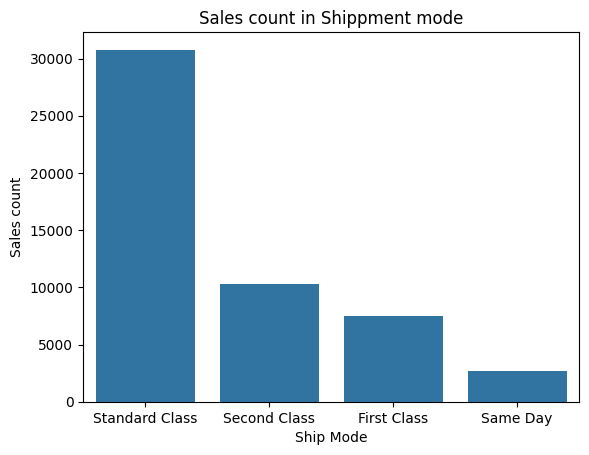

In [36]:
ShipMode = df['Ship Mode'].value_counts()
print(ShipMode)
sns.barplot(x=ShipMode.index,y=ShipMode.values)
plt.ylabel("Sales count")
plt.title("Sales count in Shippment mode")
plt.show()

#### Understanding the distribution of shipping modes used by customers provides valuable insights into the e-commerce business's logistics and delivery preferences. From the above chart we can see the breakdowns of shipping mode distribution.

In [37]:
df["Country"].nunique()

147

## Bivariate Analysis

#### Bivariate analysis is a statistical method used to examine the relationship between two different variables in a dataset. Unlike univariate analysis, which focuses on analyzing one variable at a time, bivariate analysis explores how two variables are related to each other

Here we are checking the market analysis which market area is having the maximum share and which area is having the less cunsumption

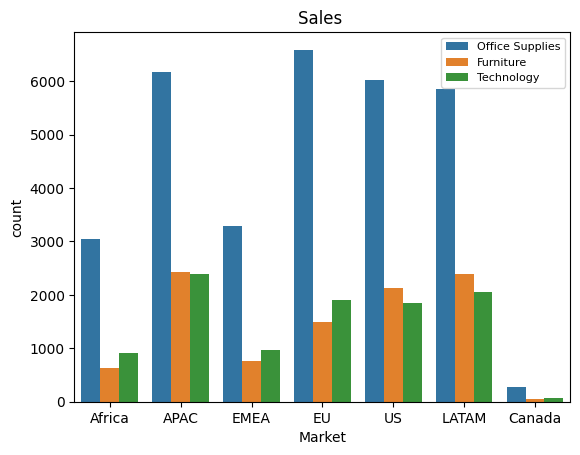

In [38]:
sns.countplot(x="Market",hue="Category",data=data)
plt.title("Sales ")
plt.legend(fontsize=8)
plt.show()

#### Understanding the distribution of sales across different markets and product categories provides valuable insights into this e-commerce business's performance and customer preferences.

#### APAC Market Dominance
From the above observation that the APAC (Asia-Pacific) market has the highest count in overall suggests that this region is a significant contributor to our e-commerce sales. This insight highlights the importance of catering to the needs and preferences of customers in the APAC region and potentially allocating resources or marketing efforts accordingly to capitalize on this market opportunity.

#### Office Supplies Sales Leadership:
Across all markets, the "Office Supplies" category emerges as the top-selling product category. This finding indicates strong demand for office-related products and suggests that customers prioritize purchases related to workplace needs or office supplies. Understanding the popularity of office supplies can inform inventory management, marketing strategies, and product assortment decisions to meet customer demand effectively.

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Identifying the Canada market as having the lowest count across all product categories provides valuable information for understanding market dynamics and potentially uncovering opportunities for growth or improvement. Here's how this observation can inform our analysis and strategic decision-making

1. Market Assessment: Analyzing the reasons behind this lower count, such as market saturation, competition, or economic factors, can help identify areas for improvement and potential strategies to revitalize sales in the Canadian market
2. Market Expansion Opportunities: Despite its current lower count, the Canadian market may present untapped opportunities for expansion and growth. Exploring targeted marketing efforts, promotional campaigns, or product offerings tailored to Canadian customers' preferences and needs can help stimulate demand and increase market share in this region
3. Customer Insights: Understanding customer behavior and preferences in the Canadian market can provide insights into unique challenges or opportunities specific to this region
4. Competitive Analysis: Assessing competitors' strategies and performance in the Canadian market can provide benchmarks for comparison and inform competitive positioning strategies. Identifying gaps or weaknesses in competitors' offerings can guide differentiation strategies
5. Resource Allocation: Based on the insights from our analysis, we can allocate resources, investments, and marketing budgets strategically to prioritize growth opportunities in the Canadian market.

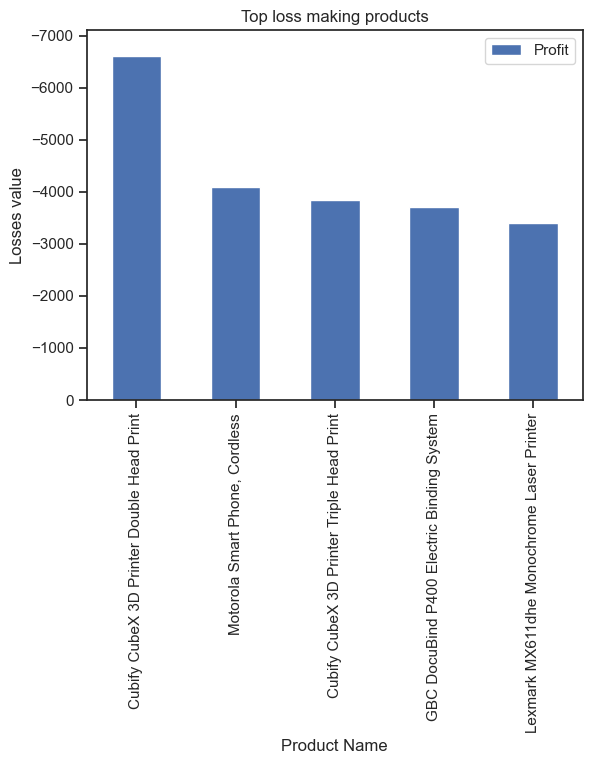

In [76]:
df = data[['Profit','Product Name']].head(20)
P = data.Profit.sort_values().head().keys()
s = data.loc[P]
s.set_index("Product Name",inplace=True)

s[['Profit']].plot.bar()
plt.ylim([0,s.iloc[0]["Profit"]-500])
plt.ylabel('Losses value')
plt.title("Top loss making products")
plt.show()

#### From the above chart we can see top 5 loss making products where 'cubify cubex 3D Printer Double Head Print' made the highest lose around 6.6K followed by few other products made losses around 4k each

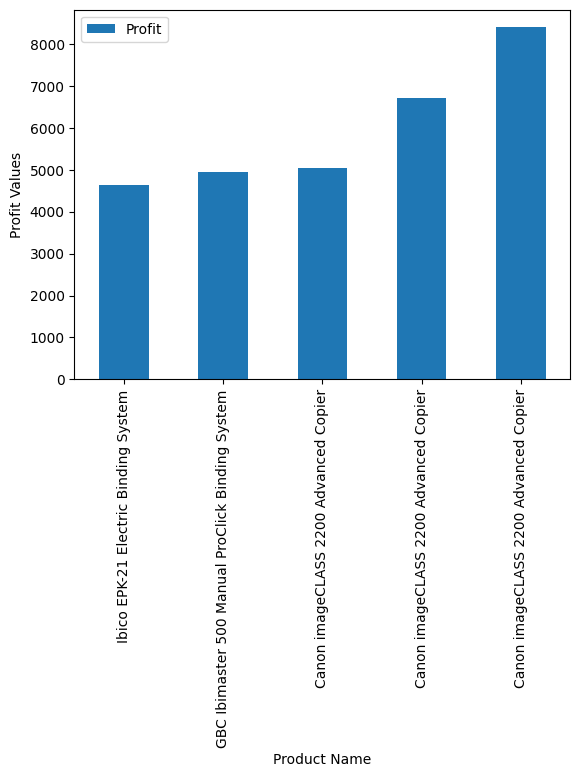

In [40]:
P = data['Profit'].sort_values().tail().keys()
l = data.loc[P]
l.set_index('Product Name', inplace = True)

l[['Profit']].plot.bar()
plt.ylabel("Profit Values")
plt.show()

#### From the above chart we can see top 5 profit making products where 'Canon imageCLASS 2200 Advanced Copier' made the highest profit around 8.3K followed by few other products made profits around 5k each

In [41]:
df1=data.copy()
df1["Order Date"] = df1["Order Date"].apply(lambda x : x.replace('/','-').split("-")[2])
df2=np.where(df1["Order Date"]=="2014")
df2=df1.iloc[df2]
df3 = df2.groupby(['Customer ID',"Customer Name"])['Discount'].sum().sort_values(ascending = False).head()
print('Top 5 highest discount received customers')
print(df3)

Top 5 highest discount received customers
Customer ID  Customer Name   
SR-20425     Sharelle Roach      9.15
TC-10980     Tamara Chand        9.10
JC-15340     Jasper Cacioppo     8.72
KB-16405     Katrina Bavinger    8.64
MG-17695     Maureen Gnade       8.37
Name: Discount, dtype: float64


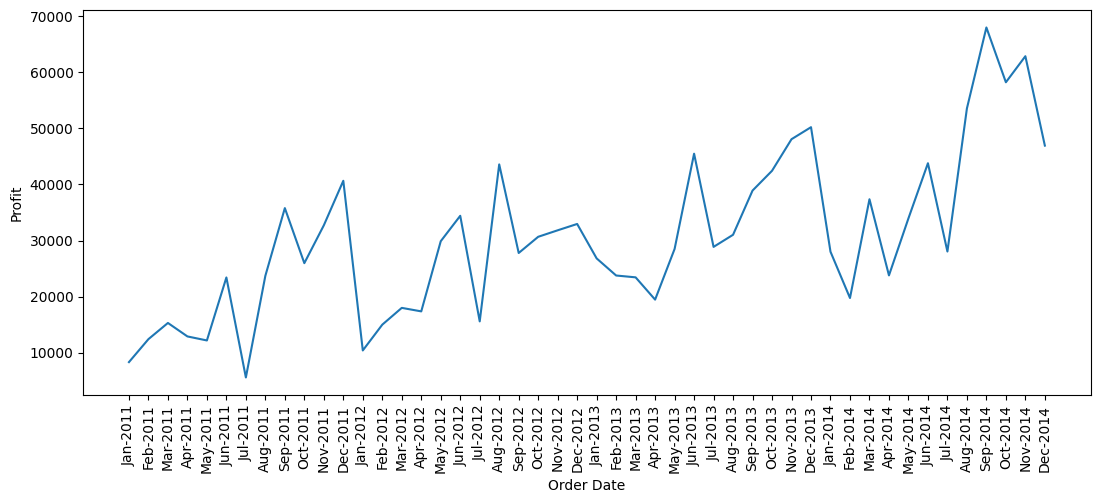

In [42]:
df = data.copy()
df['Order Date'] = df["Order Date"].apply(lambda x : datetime.strptime(x.replace('/','-'),'%d-%m-%Y').strftime("%b-%Y"))
prof = df.groupby(['Order Date'])['Profit'].sum()
prof = prof.reset_index()
prof['Date'] = pd.to_datetime(prof['Order Date'],format='%b-%Y') 
prof = prof.sort_values(by=['Date']).reset_index(drop = True)
plt.figure(figsize=(13,5))
sns.lineplot(x='Order Date',y = 'Profit',data=prof)
plt.xticks(rotation=90,ha='center')
plt.show()

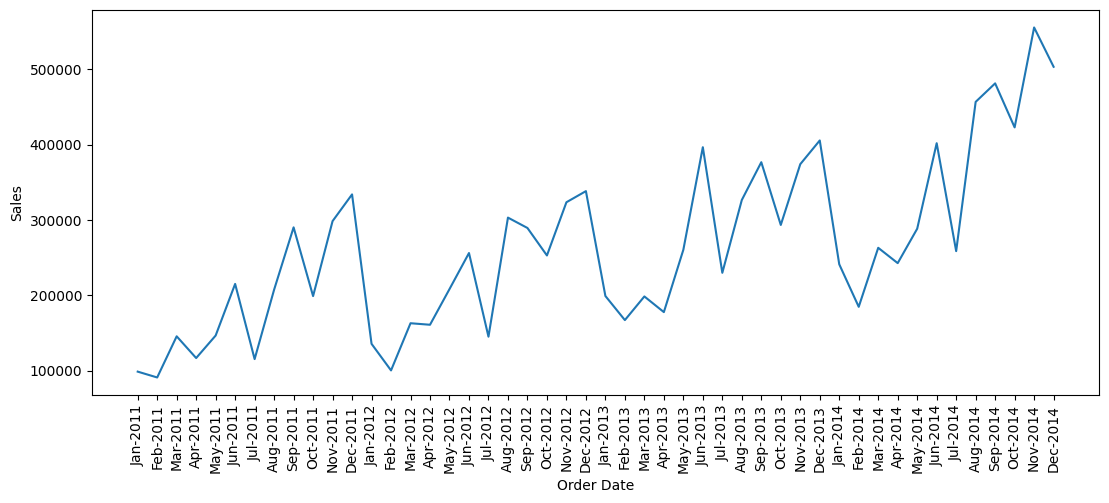

In [43]:
df = data.copy()
df['Order Date'] = df["Order Date"].apply(lambda x : datetime.strptime(x.replace('/','-'),'%d-%m-%Y').strftime("%b-%Y"))
prof = df.groupby(['Order Date'])['Sales'].sum()
prof = prof.reset_index()
prof['Date'] = pd.to_datetime(prof['Order Date'],format='%b-%Y') 
prof = prof.sort_values(by=['Date']).reset_index(drop = True)
plt.figure(figsize=(13,5))
sns.lineplot(x='Order Date',y = 'Sales',data=prof)
plt.xticks(rotation=90,ha='center')
plt.show()

#### From the above plot we can see the trend of sales from jan-2011 till Dec-2014. From the pattern we can see increasing trend in sales, but in depth if you notice Feb and July of every year the sales has dropped which indicates poor sales stategy and need attention on those months.

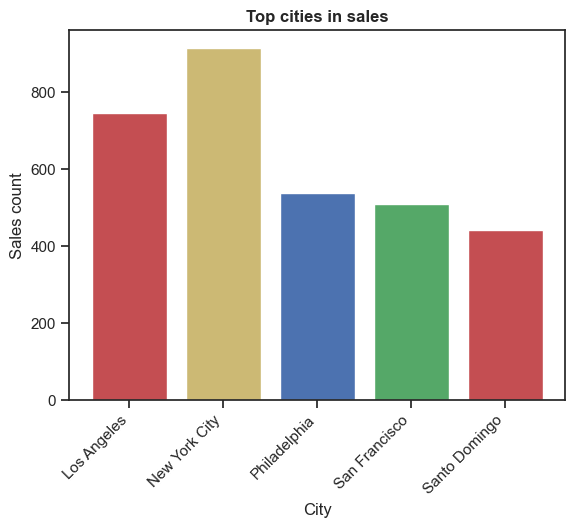

In [75]:
c = data.groupby('City')["Order ID"].count()
city = sorted(c)
city[len(city)-5]
plot = c[c.values>city[len(city)-6]]
plt.bar(plot.keys(),plot.values,color=['r','y','b','g'])
plt.xlabel('City')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Sales count')
plt.title('Top cities in sales',fontweight='bold')
plt.show()

#### Top 5 cities in sales

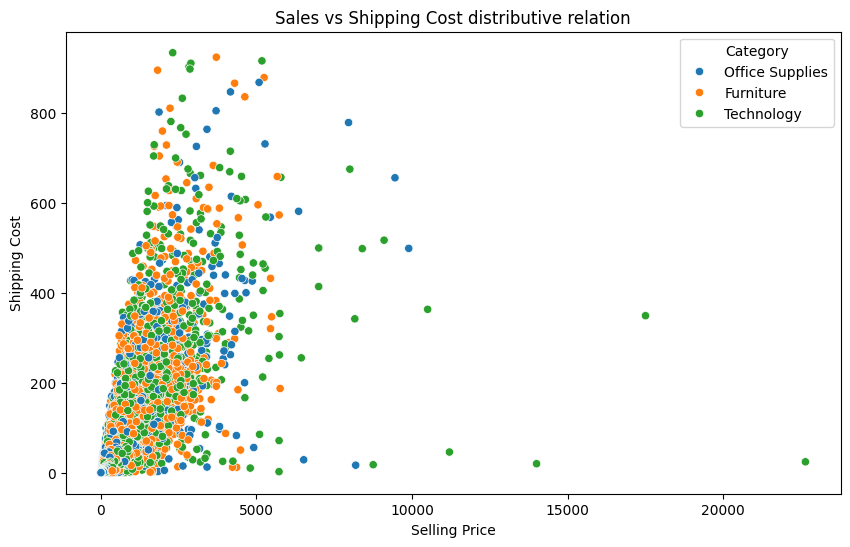

In [45]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=data,x='Sales',y='Shipping Cost',hue='Category')
#plt.scatter(data.Sales,data["Shipping Cost"],hue="Category")
plt.xlabel('Selling Price')
plt.ylabel('Shipping Cost')
plt.title('Sales vs Shipping Cost distributive relation')
plt.show()

#### From the above plot we have scatter plot for distribution relation of sales vs shipping cost, as we can see here shipping cost is higher with no relation to selling price.

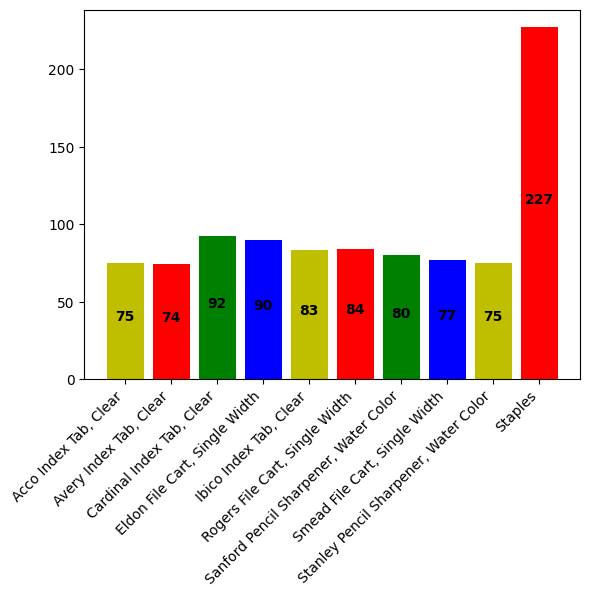

In [46]:
prd=data.groupby("Product Name")["Row ID"].count()
p=sorted(prd)
t=prd[prd.values>p[len(p)-11]]
bar = plt.bar(t.keys(),t.values,color=["y","red","g","b"])
plt.xticks(rotation=45,ha="right")

i=0
for a in bar:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy()
    plt.text(x+width/2,y+height*0.5, str(t[i]), ha='center',weight='bold')
    i=i+1

plt.show()

#### From the above bar chart we can see that top 10 selling products in E-commerce data and 'Staples' is the highest selling product. All other products in top selling list has the sales count average of 80. 

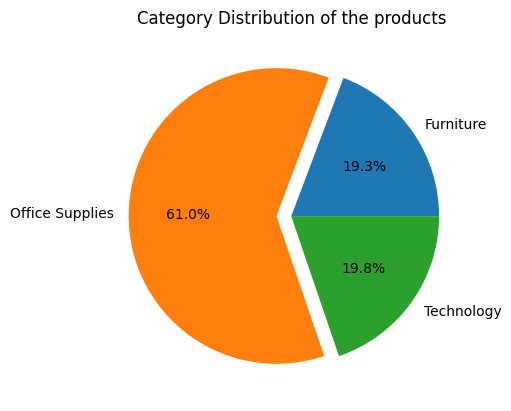

In [47]:
plt.title("Category Distribution of the products")
pie = data.groupby("Category")["Order ID"].count()
plt.pie(pie, labels = pie.keys(),autopct="%1.1f%%",explode=[0,.1,0])
plt.show()

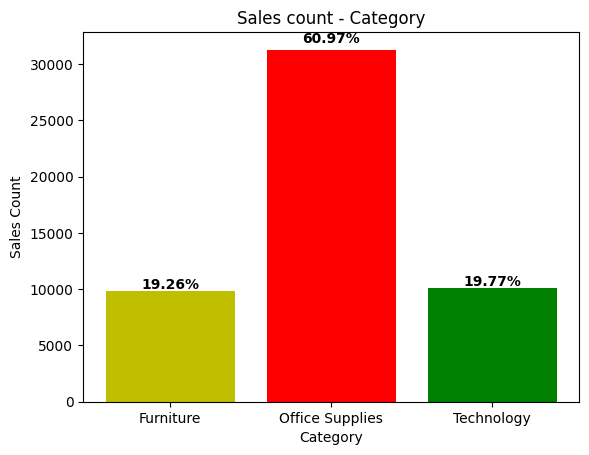

In [48]:
df=data.copy()
orders=df.groupby("Category")["Row ID"].count()
pct=round(orders*100/len(df1),2)
bars=plt.bar(orders.keys(),orders.values,color=["y","r","g"])

i=0
for p in bars:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,y+height*1.02, str(pct[i])+'%', ha='center',weight='bold')
    i=i+1
plt.xlabel('Category')
plt.ylabel('Sales Count')
plt.title('Sales count - Category')
plt.show()

In [49]:
df.groupby("Sub-Category")[["Profit","Discount","Shipping Cost"]].mean()

,Profit,Discount,Shipping Cost
Sub-Category,,,
Accessories,42.154896,0.120481,27.158888
Appliances,80.729681,0.141709,61.709846
Art,11.868505,0.117362,8.455349
Binders,11.776633,0.179207,7.831923
Bookcases,67.160688,0.153758,64.488689
Chairs,40.884178,0.163110,47.824651
Copiers,116.314687,0.117147,71.748309
Envelopes,12.156516,0.131749,7.617158
Fasteners,4.762572,0.140595,3.741153


In [50]:
data[data["Sales"]<data["Profit"]]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [51]:
res=pd.pivot_table(data=data,index="Category",values="Profit",aggfunc="mean")
res

,Profit
Category,
Furniture,28.878567
Office Supplies,16.578961
Technology,65.454958


In [52]:
Test = df['Sales']
st, pb = shapiro(Test)
print('st=%.2f, pb=%.2f' % (st, pb))

if pb > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

st=0.47, pb=0.00
Not a normal distribution


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


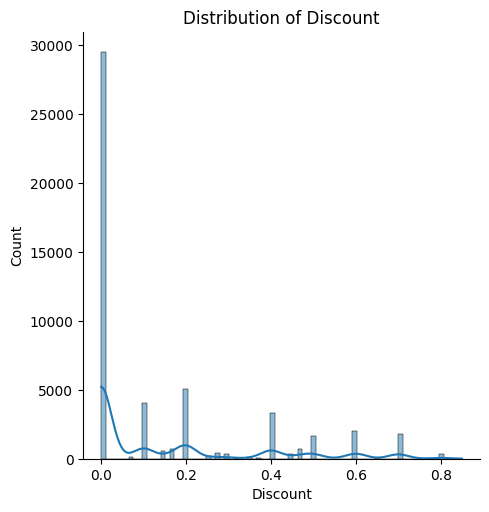

In [53]:
#plt.figure(figsize=[10,6])
plt.rcParams['figure.autolayout'] = False
sns.displot(data.Discount,kde=True)
plt.title("Distribution of Discount")
plt.show()

In [54]:
Test_Dis = df["Discount"]

st, pb = normaltest(Test_Dis)

print('st=%.2f, pb=%.2f' % (st, pb))

if pb > 0.05:
    print('Normal')

else:
    print('Not Normllay distributed')

st=10255.78, pb=0.00
Not Normllay distributed


In [55]:
pd.crosstab([data["Order Priority"],data["Ship Mode"]],[data["Category"]]).style.background_gradient(cmap="BrBG_r")

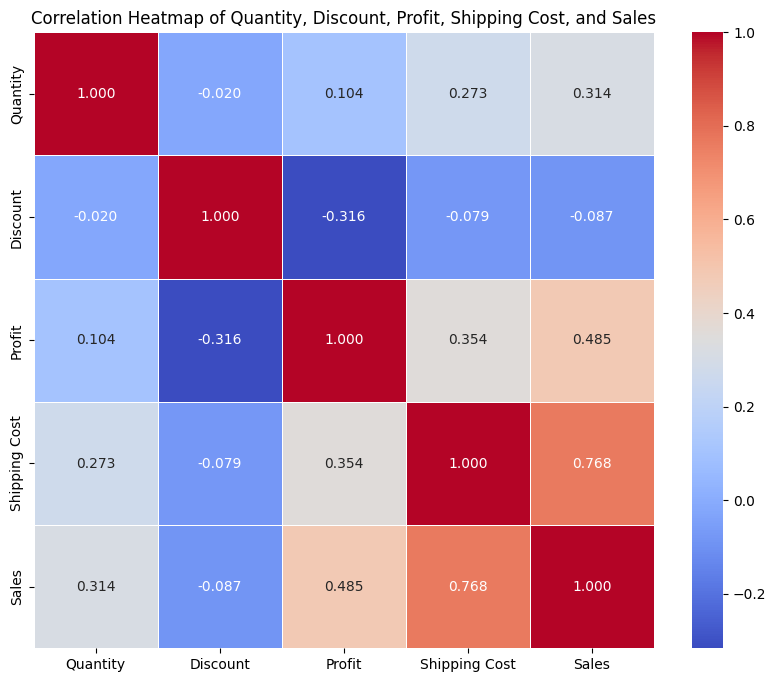

In [56]:
# Select the variables for the heatmap
variables = ["Quantity", "Discount", "Profit", "Shipping Cost", "Sales"]

# Calculate the correlation matrix
corr_matrix = data[variables].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Heatmap of Quantity, Discount, Profit, Shipping Cost, and Sales')
plt.show()

#sns.heatmap(data[["Quantity","Discount","Profit","Shipping Cost","Sales"]].corr(), annot=True, cmap="CMRmap_r")


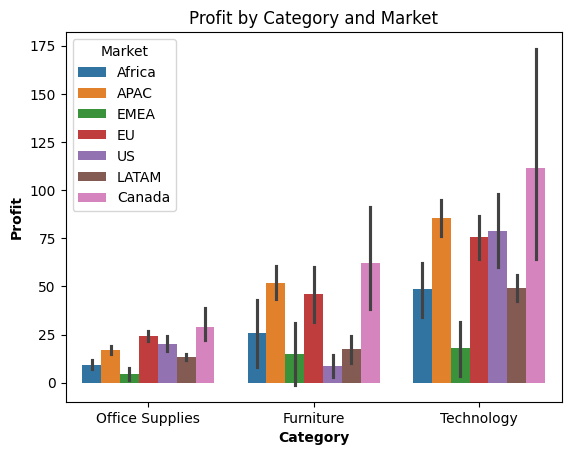

In [57]:
sns.barplot(x='Category',y='Profit',hue='Market',data=data)
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Profit',fontweight='bold')
plt.title('Profit by Category and Market')
plt.show()

#### The resulting bar plot shows the relationship between "Category" and "Profit," with each bar representing a different market category. The hue encoding differentiate bars by market, allowing for easy comparison of profits across categories and markets

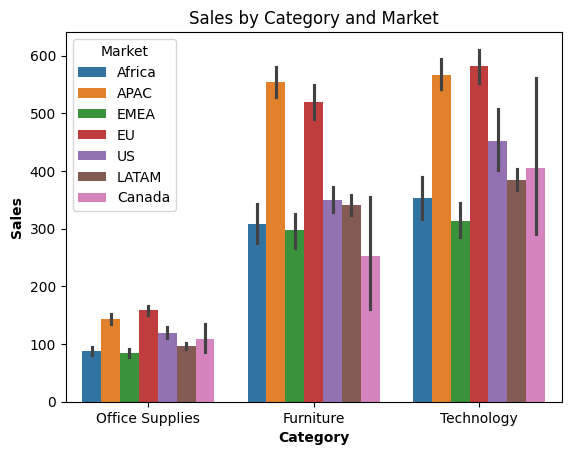

In [58]:
sns.barplot(x='Category',y='Sales',hue='Market',data=data)
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Sales',fontweight='bold')
plt.title('Sales by Category and Market')
plt.show()

#### The resulting bar plot shows the relationship between "Sales" and "Category," with each bar representing a different market category. The hue encoding differentiate bars by market, allowing for easy comparison of sales across categories and markets. 

### Market Performance Analysis: 
Recognizing that the APAC and EU markets perform above average in sales suggests that these regions may present lucrative opportunities for business expansion and growth. Allocating resources, investments, and marketing efforts strategically to capitalize on the strong sales performance in these markets can help drive further revenue and market share

### Product Category Insights: 
Observing that furniture and technology sales are nearly equal in the APAC and EU markets highlights the significance of these product categories and their appeal to customers across regions. Analyzing customer preferences, demand trends, and competitive landscapes within these categories can provide insights into market positioning, pricing strategies, and product innovation opportunities.

In [59]:
pd.crosstab([data["Order Priority"],data["Category"]],[data["Market"]]).style.background_gradient(cmap="cool")

In [60]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


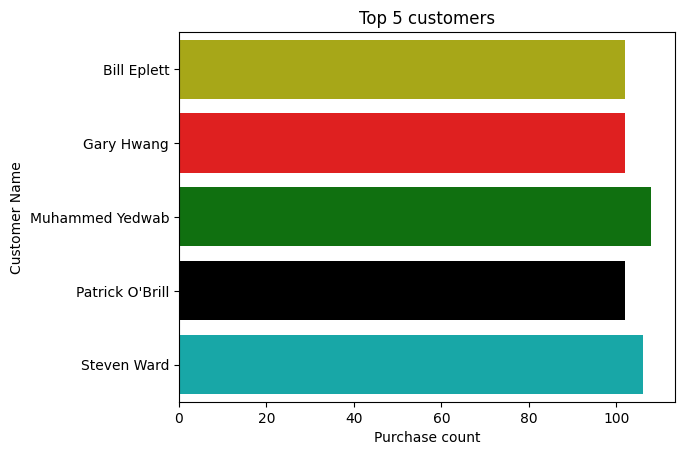

In [61]:
c = data.groupby("Customer Name")['Row ID'].count()
cu = sorted(c)
cu[len(cu)-5]
out = c[c.values>cu[len(cu)-6]]
sns.barplot(x=out.values,y=out.keys(),hue=out.keys(),palette=["y","red","g","k",'c'])
plt.title("Top 5 customers")
plt.xlabel('Purchase count')
plt.show()

### Customer Analysis
#### Muhammed stands out as the top customer, having made the highest number of purchases, with a count of 110 transactions. This indicates a strong and consistent patronage from Muhammed, highlighting their loyalty and potentially significant contribution to your business's revenue. Understanding the preferences, purchasing patterns, and satisfaction levels of top customers like Muhammed can inform personalized marketing strategies, loyalty programs, and customer relationship management initiatives aimed at fostering long-term relationships and maximizing customer lifetime value.

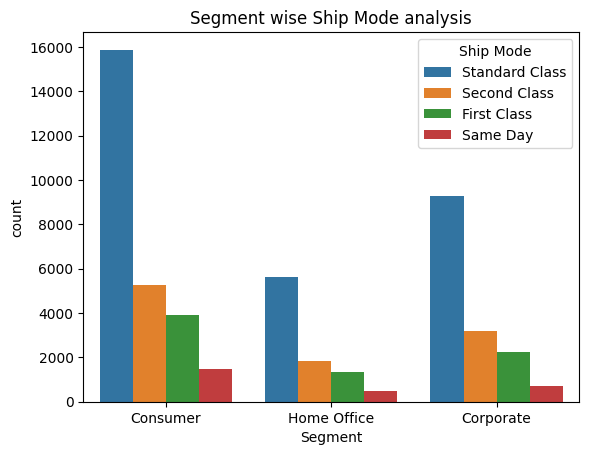

In [62]:
sns.countplot(x='Segment',hue='Ship Mode',data=data)
plt.title("Segment wise Ship Mode analysis")
plt.show()

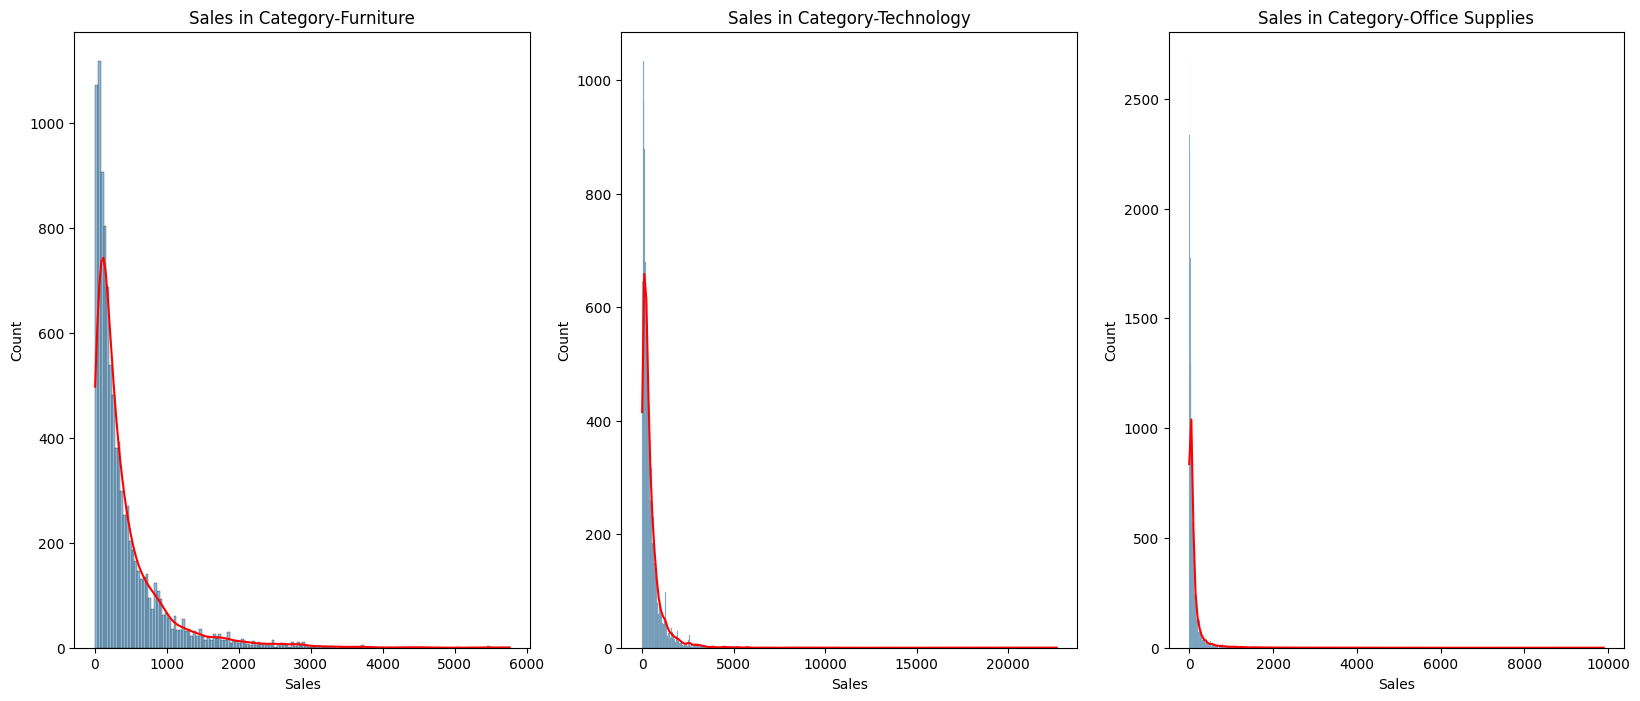

In [63]:
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.histplot(data.loc[data["Category"]=='Furniture',"Sales"],ax=ax[0],kde=True)
ax[0].lines[0].set_color('r')
ax[0].set_title("Sales in Category-Furniture")

sns.histplot(data.loc[data["Category"]=='Technology',"Sales"],ax=ax[1],kde=True)
ax[1].lines[0].set_color('r')
ax[1].set_title("Sales in Category-Technology")

sns.histplot(data.loc[data["Category"]=='Office Supplies',"Sales"],ax=ax[2],kde=True)
ax[2].lines[0].set_color('r')
ax[2].set_title("Sales in Category-Office Supplies")


plt.show()

#### Using histplot to analyze the relationship between sales and different product categories (Furniture, Technology, Office Supplies) allows for a visual exploration of the distribution of sales within each category. From the above groups we can understand below topics.
1. Sales Distribution
2. Category Comparisons
3. Outlier Detection
4. Skewness and Central Tendency
5. Variability and Spread

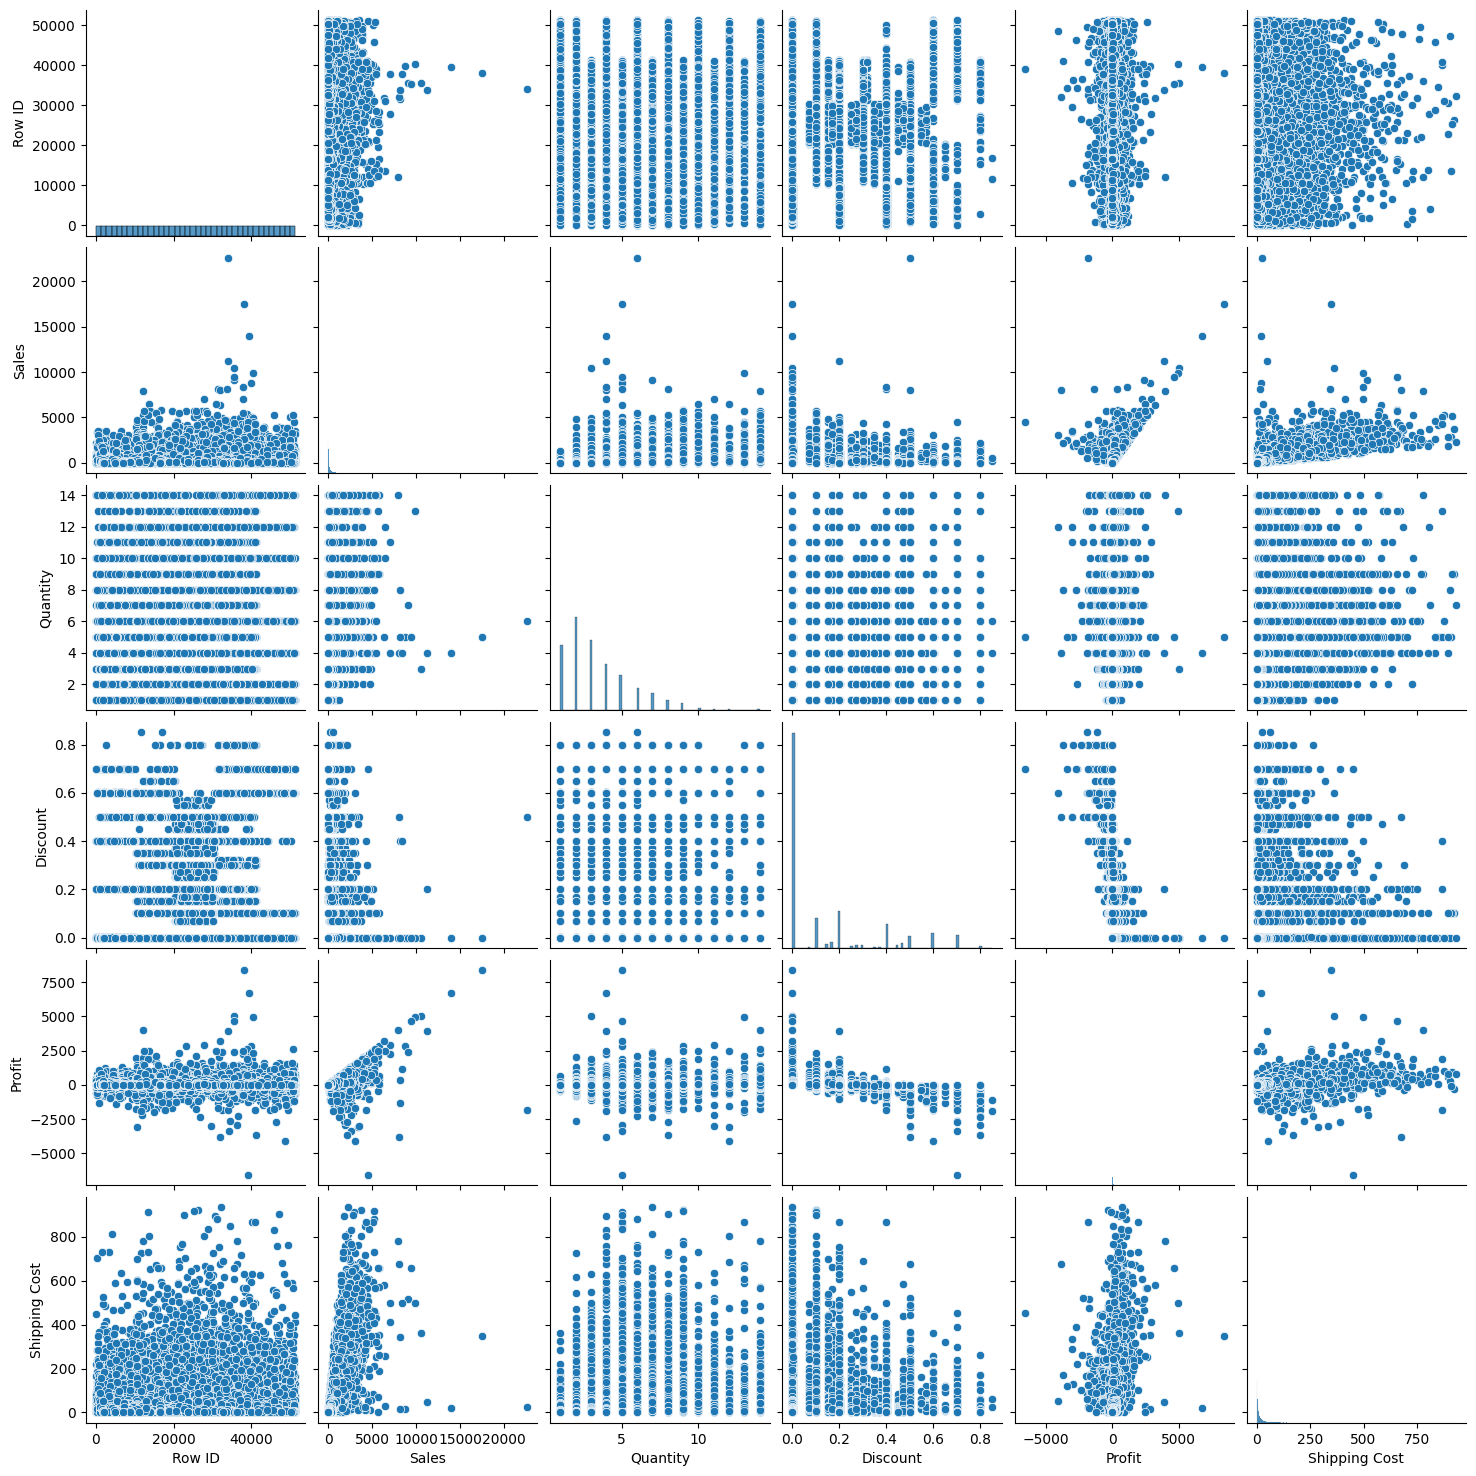

In [64]:
sns.pairplot(data)
plt.show()

In [65]:
df = data.copy()
df = df.drop(columns=["Row ID"])
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


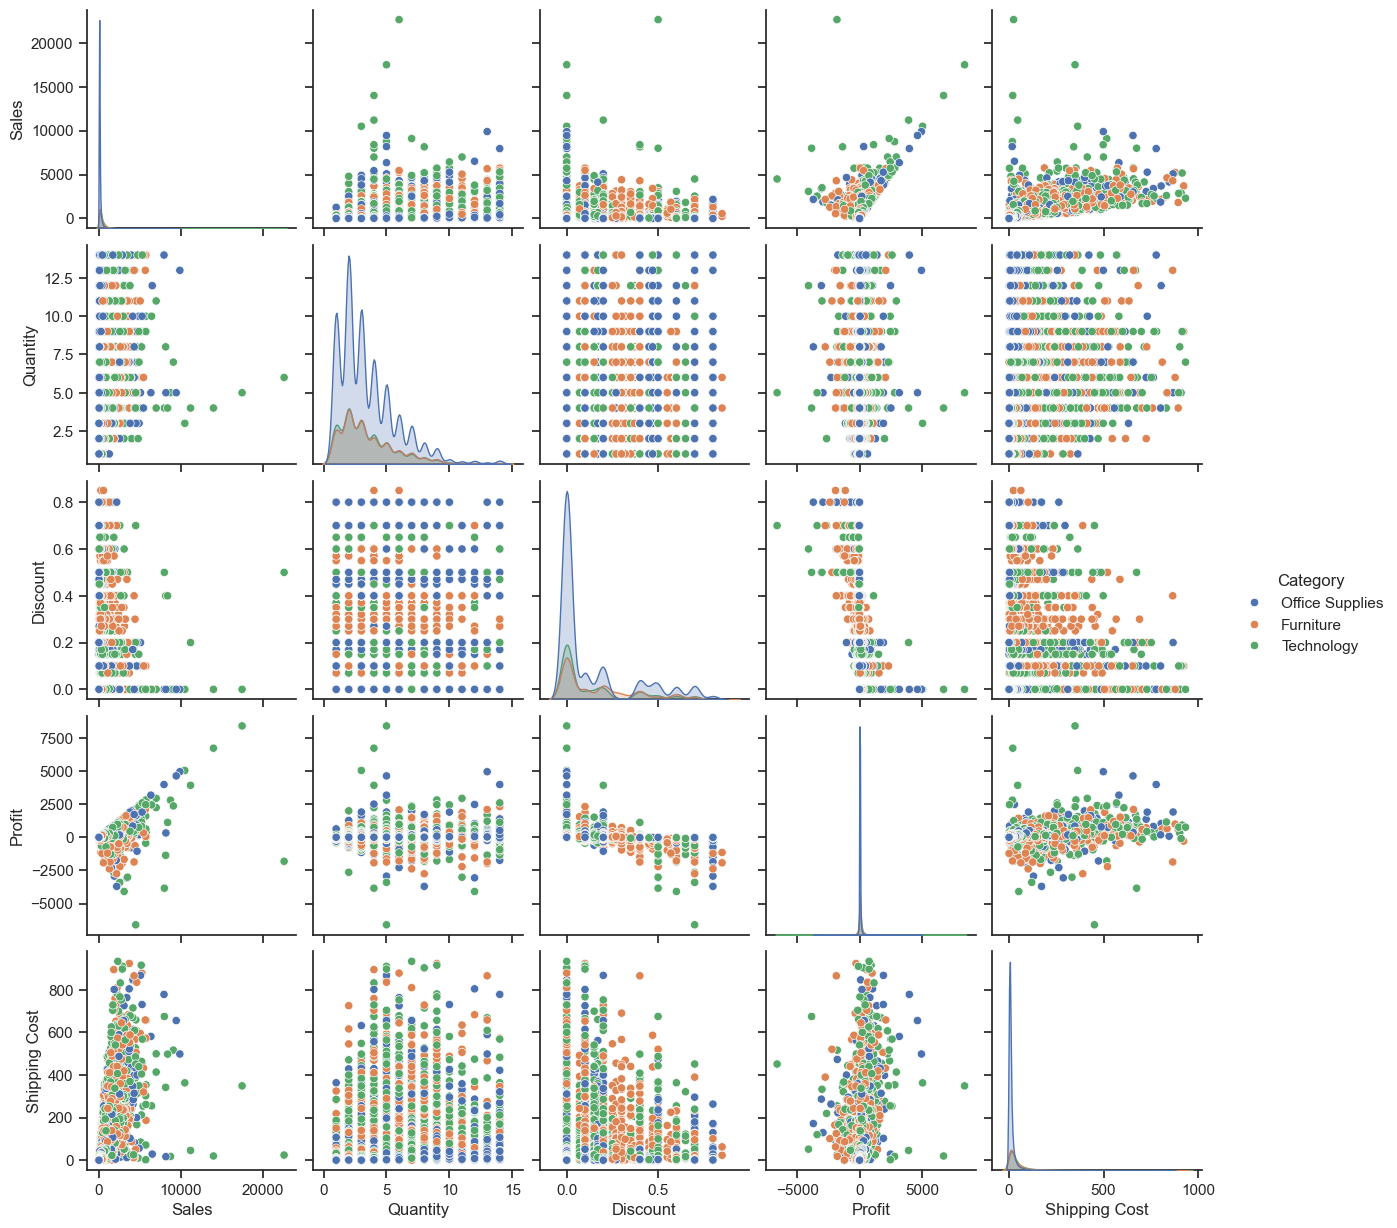

In [66]:
df = data.copy()
df = df.drop(columns=["Row ID"])

sns.set_theme(style="ticks")
#df = sns.load_dataset("data")
sns.pairplot(df, hue="Category")
plt.show()

#### Using a pairplot to visualize e-commerce data with "Category" as the hue variable is a powerful way to explore relationships between multiple numerical variables while also considering categorical distinctions. Pairplots provide a comprehensive overview of pairwise relationships and allow for the identification of patterns and trends across different categories. Here's a summary of what you might observe from such an analysis: